# **Визуализация геофизических данных**

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib notebook

Далее, считываем массив данных и зависываем их в переменную **v1**, и выводим его.
Для работы с 3D данными нам нужно изменить форму массива из одномерного в трехмерный. 
В данном случае массив **v1** изменяем и записываем в переменную **a**. 
Отдельно задаем массивы для дальнейшей работы с индексацией по координатам **x**, **y**, **z**. 
Массив **visiblebox** возвращает новый массив указанной формы и типа, заполненный единицами.

In [17]:
v1 = np.arange(7600)
a=v1.reshape(20,20,19)
x,y,z = np.mgrid[0:21,0:21,0:20]
visiblebox=np.ones(a.shape,dtype='bool')

Функция **plt.figure** - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько.
Функция **plt.gca** - получает текущие оси.
Функция **plt.Normalize** - линейно нормализует данные по заданным параметрам.
Функция **plt.get_cmap** - присвоение цвета.
С помощью функции **voxels** и внутренних параметров строится сама модель.
функция **invert_zaxis** - инвертирует ось z для правильного отображения геофизических параметров.
И функция **set_label** - присваивает имя для какой-либо из осей.

<IPython.core.display.Javascript object>


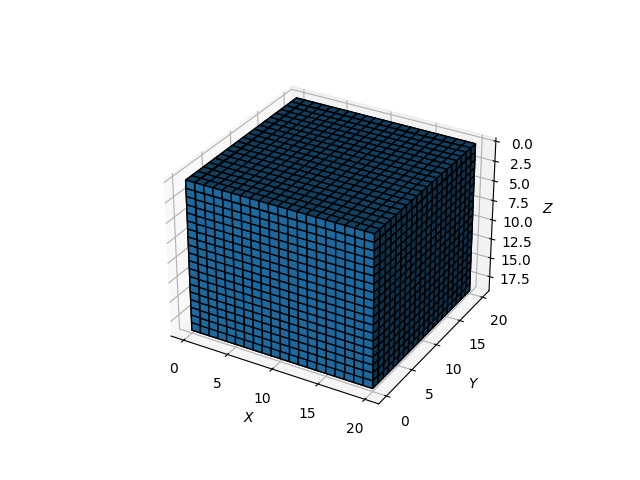

In [20]:
fig = plt.figure()
ax1 = fig.gca(projection='3d')
normA= plt.Normalize(a.min(), a.max())
cmapA = plt.get_cmap("seismic")
ax1.voxels(x,y,z,visiblebox, edgecolors='k')
ax1.invert_zaxis()
ax1.set_xlabel ('$X$')
ax1.set_ylabel ('$Y$')
ax1.set_zlabel ('$Z$')

Перейдем к примеру с настоящими данными, которые будут считаны из csv файла с помощью функции **np.genfromtxt** и входящих параметров (путь к файлу, разделитель и стандарт кодирования).

<IPython.core.display.Javascript object>


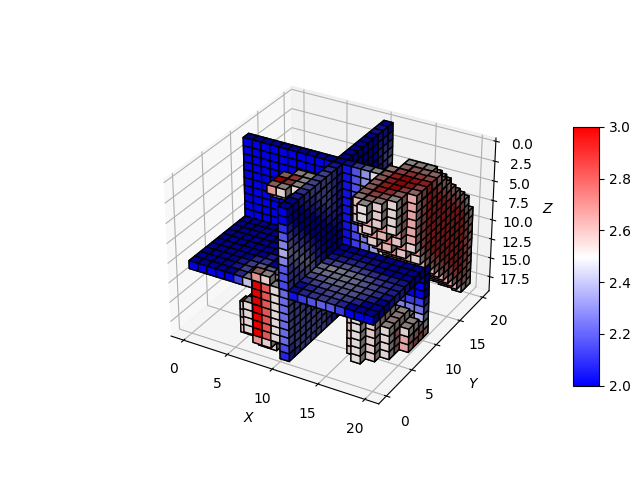

In [21]:
v1 = np.genfromtxt('3D_2.csv',delimiter=',', encoding='utf-8-sig')
a=np.sort(v1.flatten())
c = pd.Series(a).mode()[0] #исключить моду
g = pd.Series(a[a!=c]).describe()[4]
k = pd.Series(a[a!=c]).describe()[6]
a=v1.reshape(20,20,19)
x,y,z = np.mgrid[0:21,0:21,0:20]
visiblebox=np.zeros(a.shape,dtype='bool')
visiblebox[(a>k)]=1
visiblebox[(a == c)] = 0

visiblebox[10:21:10,:,:]=1
visiblebox[:,10:21:10,:]=1
visiblebox[:,:,10:21:10]=1



fig = plt.figure()
ax1 = fig.gca(projection='3d')
normA= plt.Normalize(a.min(), a.max())
cmapA = plt.get_cmap("bwr")

ax1.voxels(x,y,z,visiblebox, facecolors=cmapA(normA(a)), edgecolors='k')
ax1.invert_zaxis()
ax1.set_xlabel ('$X$')
ax1.set_ylabel ('$Y$')
ax1.set_zlabel ('$Z$')
m = cm.ScalarMappable(cmap=cmapA, norm=normA)

axins = inset_axes(ax1,
                   width="7%",
                   height="70%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=3,
                   )
plt.colorbar(m, cax=axins)